<a href="https://colab.research.google.com/github/atoothman/Data-71200-Projects-/blob/main/Data_71200_Project_1_Glass_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 71200 - Project 1 Glass Identification

# Step 1: Load Dataset

In [5]:
import pandas as pd

# Raw URL of the dataset file on GitHub
url = "https://raw.githubusercontent.com/atoothman/Data-71200-Projects-/main/glass%2Bidentification/glass.data"


# Load the dataset into DataFrame
glass_df = pd.read_csv(url, header=None, index_col=False, names=[
    'ID', 'Refractive Index', 'Sodium', 'Magnesium', 'Aluminum',
    'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron', 'Class'])

# Display the DataFrame before dropping 'ID'
print("Before dropping 'ID':")
print(glass_df.head())

# Drop the 'ID' column
glass_df.drop(columns=['ID'], inplace=True)

# Display the DataFrame after dropping 'ID'
print("\nAfter dropping 'ID':")
print(glass_df.head())


Before dropping 'ID':
   ID  Refractive Index  Sodium  Magnesium  Aluminum  Silicon  Potassium  \
0   1           1.52101   13.64       4.49      1.10    71.78       0.06   
1   2           1.51761   13.89       3.60      1.36    72.73       0.48   
2   3           1.51618   13.53       3.55      1.54    72.99       0.39   
3   4           1.51766   13.21       3.69      1.29    72.61       0.57   
4   5           1.51742   13.27       3.62      1.24    73.08       0.55   

   Calcium  Barium  Iron  Class  
0     8.75     0.0   0.0      1  
1     7.83     0.0   0.0      1  
2     7.78     0.0   0.0      1  
3     8.22     0.0   0.0      1  
4     8.07     0.0   0.0      1  

After dropping 'ID':
   Refractive Index  Sodium  Magnesium  Aluminum  Silicon  Potassium  Calcium  \
0           1.52101   13.64       4.49      1.10    71.78       0.06     8.75   
1           1.51761   13.89       3.60      1.36    72.73       0.48     7.83   
2           1.51618   13.53       3.55      1.54    

display(glass_df) confirms that all features (9) and instances (214) as listed on the website have been loaded.

### Explore original glass_df

Examining the original glass_df before splitting occurs

*note that class is a categorical variable, but has Dtype as int below

In [6]:
# Show info on glass_df
print("Info on glass_df:")
glass_df.info()
print()


# Show description of glass_df
print("Description of glass_df:")
glass_df.describe()

Info on glass_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Refractive Index  214 non-null    float64
 1   Sodium            214 non-null    float64
 2   Magnesium         214 non-null    float64
 3   Aluminum          214 non-null    float64
 4   Silicon           214 non-null    float64
 5   Potassium         214 non-null    float64
 6   Calcium           214 non-null    float64
 7   Barium            214 non-null    float64
 8   Iron              214 non-null    float64
 9   Class             214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB

Description of glass_df:


,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Check for missing values in dataset before splitting

The dataset on UCI ML repository lists zero missing values. Double checking below and confirming there are zero missing values.

In [7]:
# Check for missing values in glass_df
missing_values = glass_df.isnull().sum()

# Print missing values in glass_df
print("Missing Values:")
print(missing_values)

Missing Values:
Refractive Index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Class               0
dtype: int64


# Step 2: Divide into a training set and testing set

To create a balanced split StratifiedShuffleSplit will be utilized below with a 20% test size and 80% training size

In [8]:
# Utilize scikitlearn for a stratify split
from sklearn.model_selection import StratifiedShuffleSplit

# Separate the features (X) and the target variable (y) aka Class
X = glass_df.drop('Class', axis=1)
y = glass_df['Class']

# Create StratifiedShuffleSplit with 1 split, 20% test size, 80% training and random state 42
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# Split data
for train_index, test_index in split.split(X, y):
   X_train = X.iloc[train_index]
   X_test = X.iloc[test_index]
   y_train = y.iloc[train_index]
   y_test = y.iloc[test_index]

# Check to confirm successful 80 : 20 split
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (171, 9)
X_test: (43, 9)
y_train: (171,)
y_test: (43,)


Confirming the split was successful. The training set has 80% of the original 214 instances, while the testing set has 20% of the original instances. 9 in the X-train and X_test show the number of columns/features.

# Step 3: Explore training set


with Pandas data fram and using the below panadas funcations to explore data
*   DataFrame.info()
*   DataFrame.describe()

In [9]:
# Training set infomation on X_train
print("Info on X_train:")
X_train.info()
print()


# Training set description of X_train
print("Description of X_train:")
X_train.describe()

Info on X_train:
<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 201 to 178
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Refractive Index  171 non-null    float64
 1   Sodium            171 non-null    float64
 2   Magnesium         171 non-null    float64
 3   Aluminum          171 non-null    float64
 4   Silicon           171 non-null    float64
 5   Potassium         171 non-null    float64
 6   Calcium           171 non-null    float64
 7   Barium            171 non-null    float64
 8   Iron              171 non-null    float64
dtypes: float64(9)
memory usage: 13.4 KB

Description of X_train:


,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,1.518503,13.373567,2.738304,1.434035,72.641637,0.489064,8.957427,0.177368,0.063801
std,0.003077,0.836909,1.414753,0.488392,0.791757,0.555769,1.370504,0.516317,0.103334
min,1.511150,10.730000,0.000000,0.340000,69.810000,0.000000,5.790000,0.000000,0.000000
25%,1.516525,12.870000,2.260000,1.180000,72.300000,0.130000,8.235000,0.000000,0.000000
50%,1.517690,13.250000,3.480000,1.350000,72.780000,0.560000,8.600000,0.000000,0.000000
75%,1.519170,13.795000,3.610000,1.620000,73.095000,0.610000,9.165000,0.000000,0.110000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [10]:
# Training set infomation on y_train
print("Info on y_train:")
y_train.info()
print()

# Training set description of y_train
print("Description of y_train:")
y_train.describe()

Info on y_train:
<class 'pandas.core.series.Series'>
Index: 171 entries, 201 to 178
Series name: Class
Non-Null Count  Dtype
--------------  -----
171 non-null    int64
dtypes: int64(1)
memory usage: 2.7 KB

Description of y_train:


count    171.000000
mean       2.766082
std        2.095714
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: Class, dtype: float64

# Step 4: Data Cleaning

Address any missing values in the training set and testing set

### Checking missing values in training set

In [11]:
# Checking missing values in training set

# Check for missing values in X_train
missing_values = X_train.isnull().sum()

# Print missing values in X_train
print("Missing Values in X_train:")
print(missing_values)
print()

# Check for missing values in y_train
missing_values = y_train.isnull().sum()

# Print missing values in y_train
print("Missing Values in y_train:")
print(missing_values)

Missing Values in X_train:
Refractive Index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
dtype: int64

Missing Values in y_train:
0


### Check missing values in test set

In [12]:
# Checking missing values in test set

# Check for missing values in X_test
missing_values = X_test.isnull().sum()

# Print missing values in X_test
print("Missing Values in X_test:")
print(missing_values)
print()

# Check for missing values in y_test
missing_values = y_test.isnull().sum()

# Print missing values in y_test
print("Missing Values in y_test:")
print(missing_values)

Missing Values in X_test:
Refractive Index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
dtype: int64

Missing Values in y_test:
0


# Step 5: Visualize the data in the training set

Utilize the pandas functions to visualize the data

*   DataFrame.hist
*   plotting.scatter_matrix()

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

### Histograms and Scatter Matrix for training set (X_train)

Histograms of X_train:


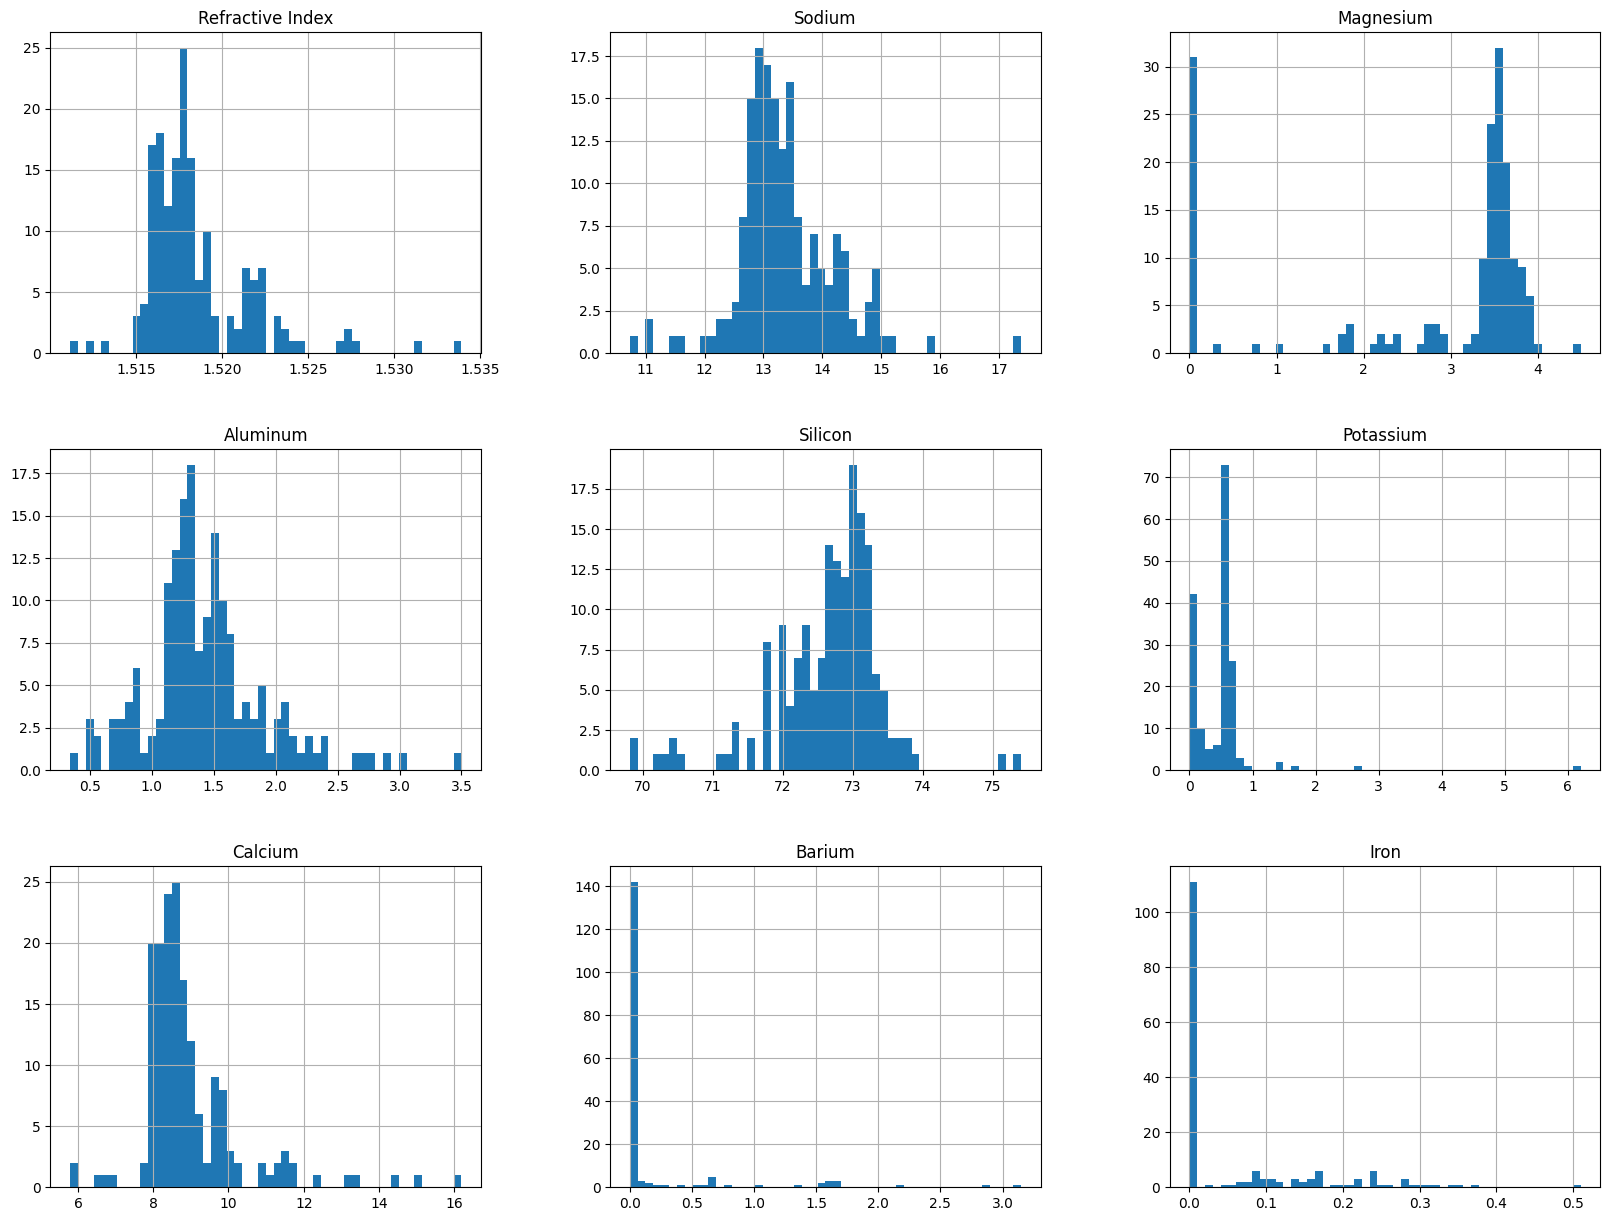

In [14]:
# Histograms of X_train
print("Histograms of X_train:")
X_train.hist(bins=50, figsize=(20,15))
plt.show()

Scatter_matrix of X_train:


array([[<Axes: xlabel='Refractive Index', ylabel='Refractive Index'>,
        <Axes: xlabel='Sodium', ylabel='Refractive Index'>,
        <Axes: xlabel='Magnesium', ylabel='Refractive Index'>,
        <Axes: xlabel='Aluminum', ylabel='Refractive Index'>,
        <Axes: xlabel='Silicon', ylabel='Refractive Index'>,
        <Axes: xlabel='Potassium', ylabel='Refractive Index'>,
        <Axes: xlabel='Calcium', ylabel='Refractive Index'>,
        <Axes: xlabel='Barium', ylabel='Refractive Index'>,
        <Axes: xlabel='Iron', ylabel='Refractive Index'>],
       [<Axes: xlabel='Refractive Index', ylabel='Sodium'>,
        <Axes: xlabel='Sodium', ylabel='Sodium'>,
        <Axes: xlabel='Magnesium', ylabel='Sodium'>,
        <Axes: xlabel='Aluminum', ylabel='Sodium'>,
        <Axes: xlabel='Silicon', ylabel='Sodium'>,
        <Axes: xlabel='Potassium', ylabel='Sodium'>,
        <Axes: xlabel='Calcium', ylabel='Sodium'>,
        <Axes: xlabel='Barium', ylabel='Sodium'>,
        <Axes: xlabel

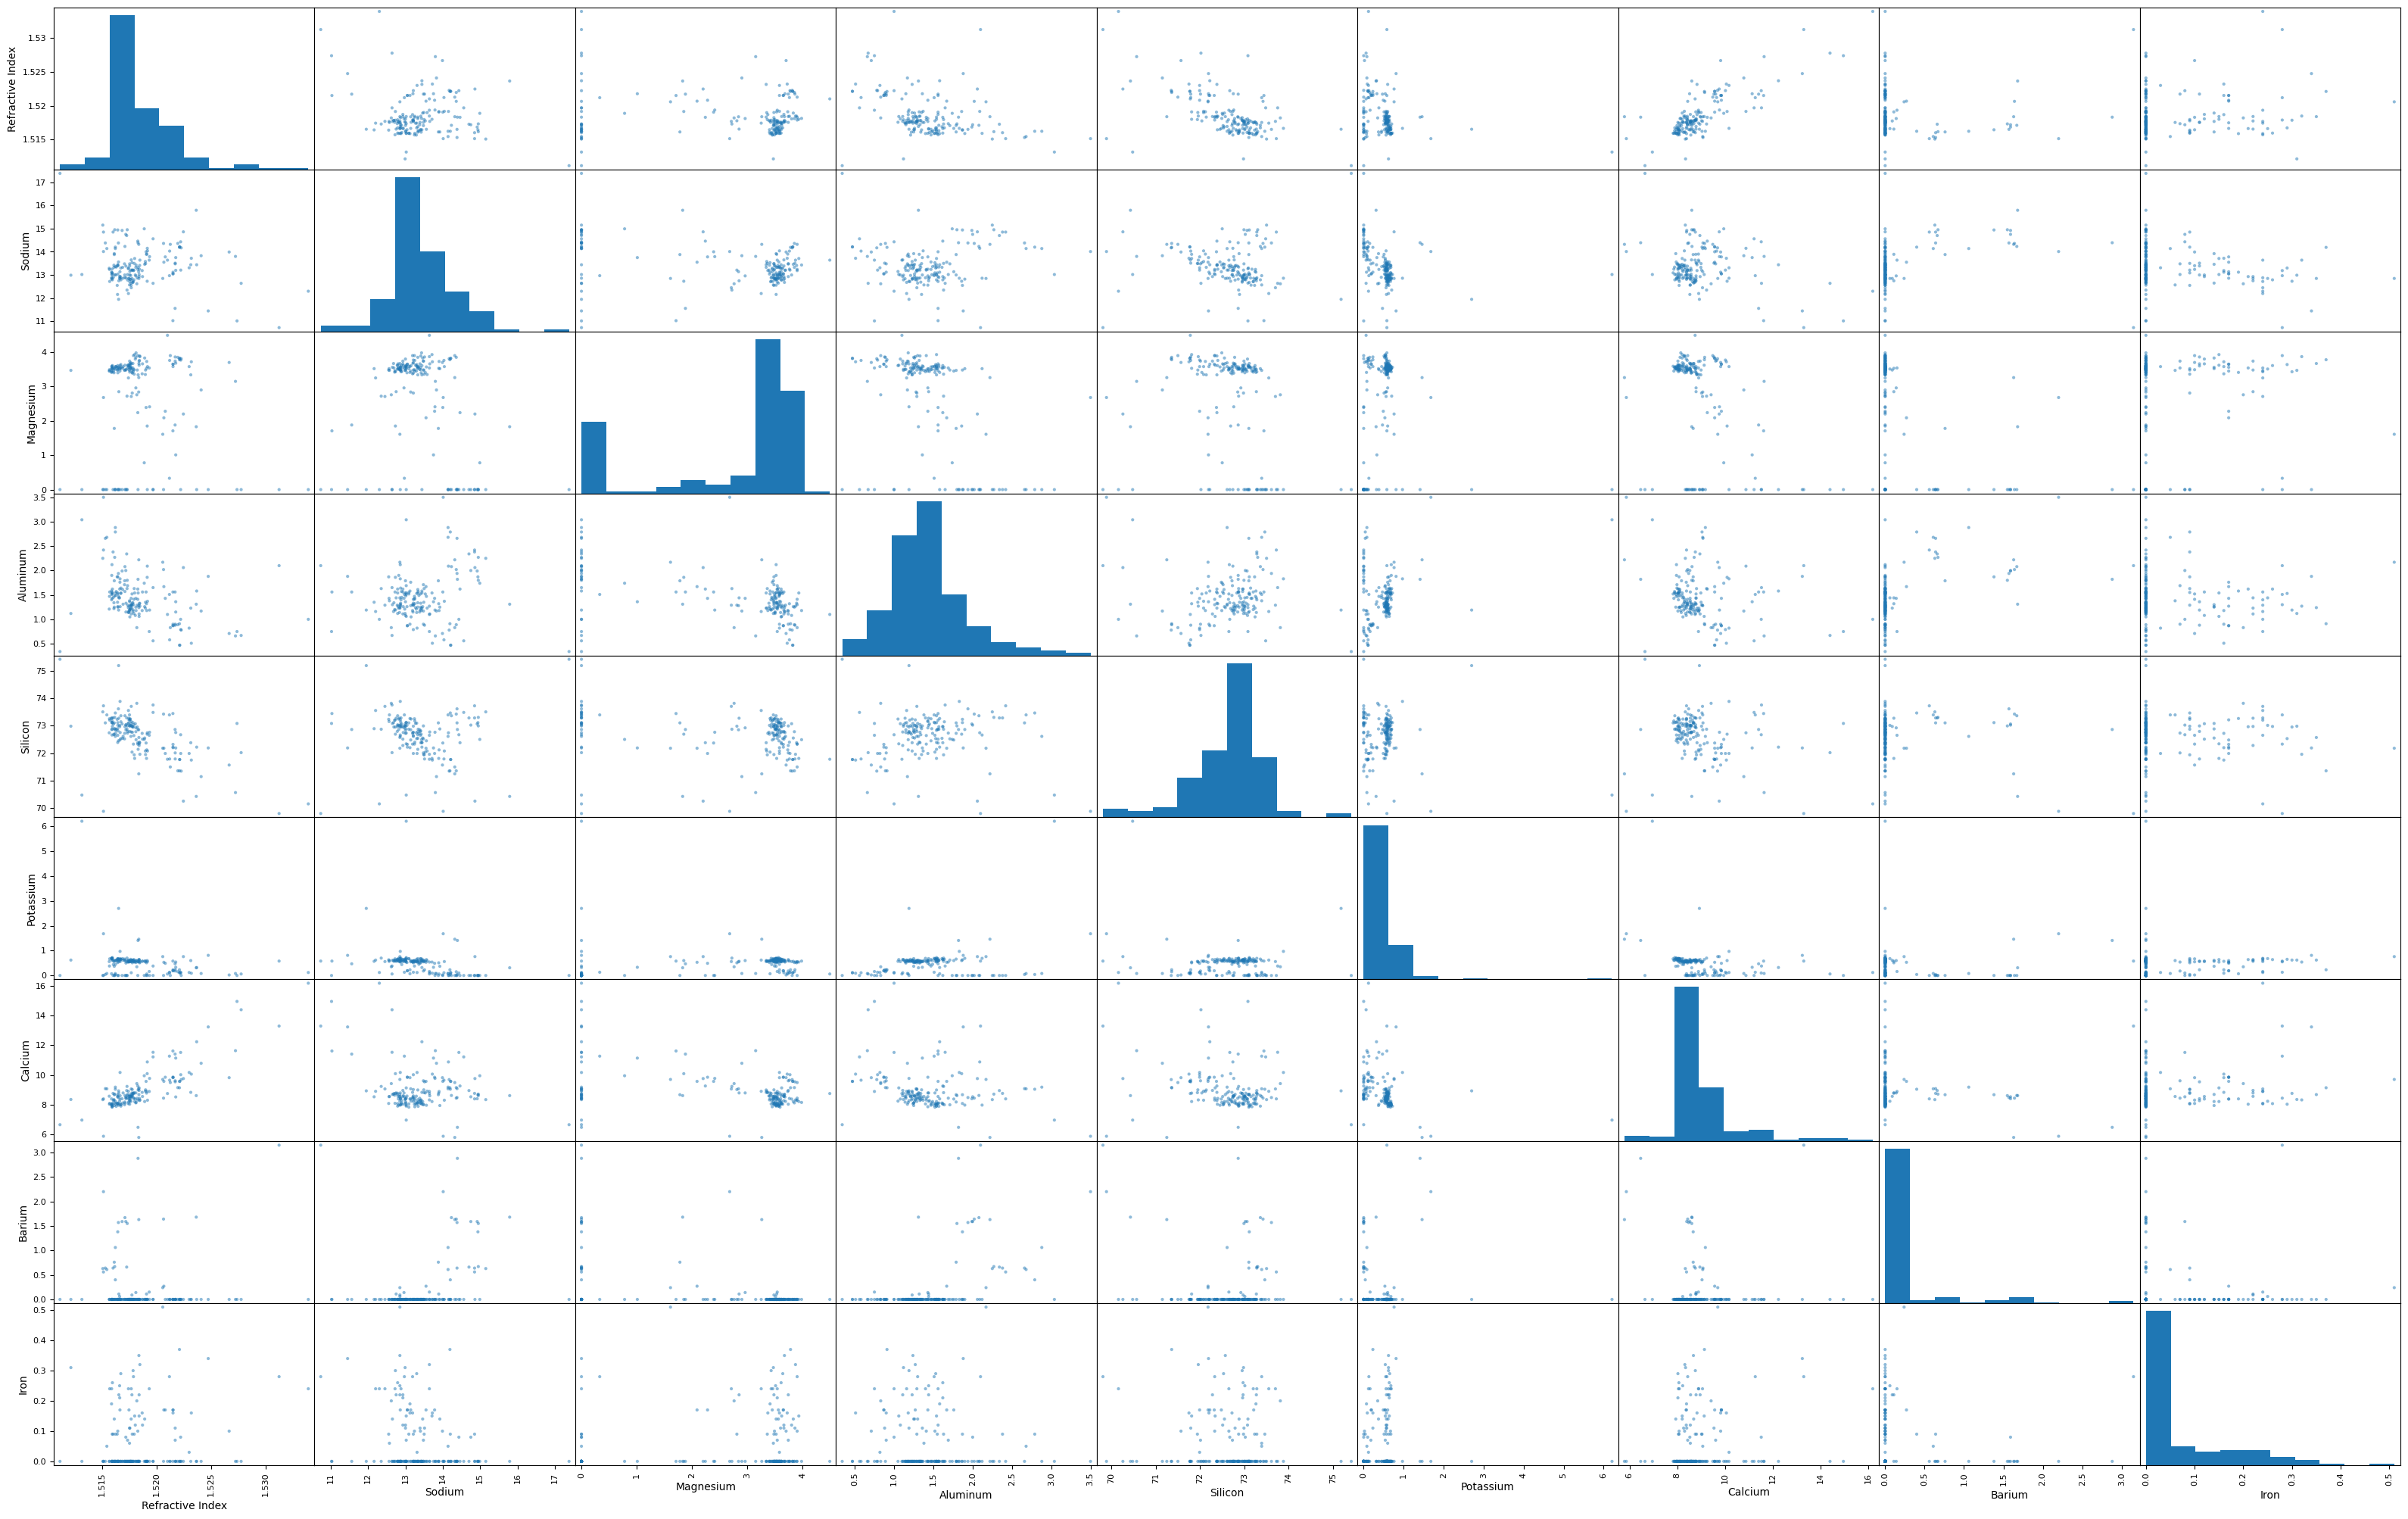

In [16]:
# Scatter_matrix of X_train
attributes = ['Refractive Index', 'Sodium', 'Magnesium', 'Aluminum',
    'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron']
print("Scatter_matrix of X_train:")
scatter_matrix(X_train[attributes], figsize=(40, 25))

### Histogram of y_train

Histograms of y_train:


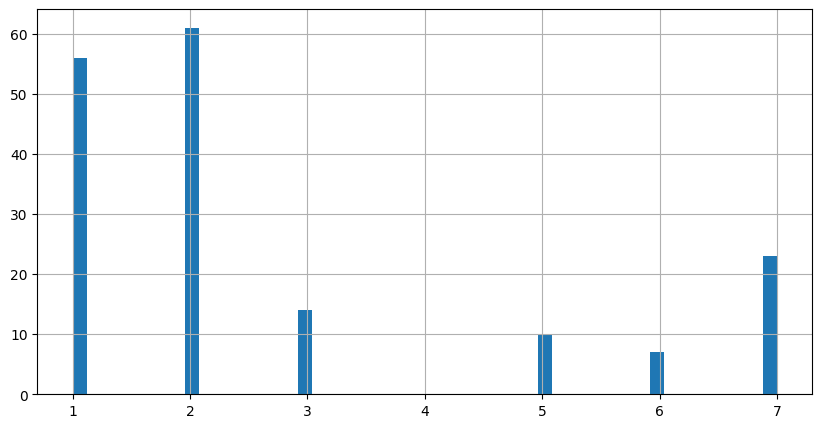

In [17]:
# Histogram of y_train
print("Histograms of y_train:")
y_train.hist(bins=50, figsize=(10,5))
plt.show()

In [19]:
# Scatter_matrix of y_train

# print("Scatter_matrix of y_train:")
# scatter_matrix(y_train['Color'], figsize=(20, 15))

# Step 6: Apply transformations to data

Apply the below transformations to 2 features (Sodium & Silicon) from the dataset
*  Squaring (**2)
*  Cubing (**3)
*  np.log
*  np.exp

Plot histograms and scatter matrices to explore the resultant data

### Transformations (squaring, cubbing, np.log and np.exp) applied to Sodium feature in training set and represented as 4 histograms

Original Sodium Histogram:


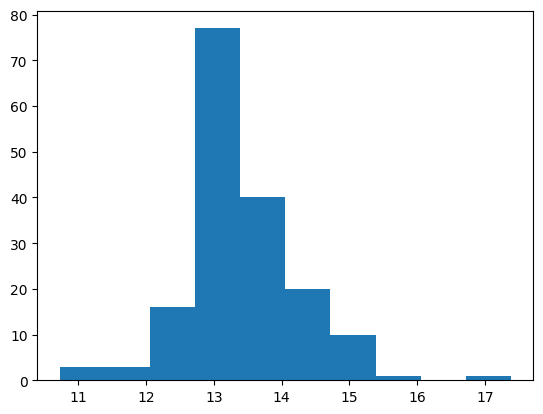


Sodium Squaring Histogram:


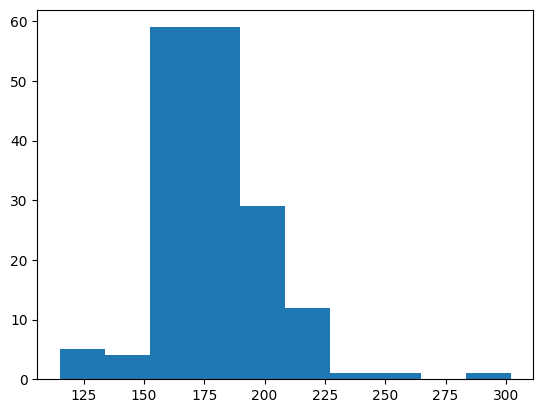


Sodium Cubing Histogram:


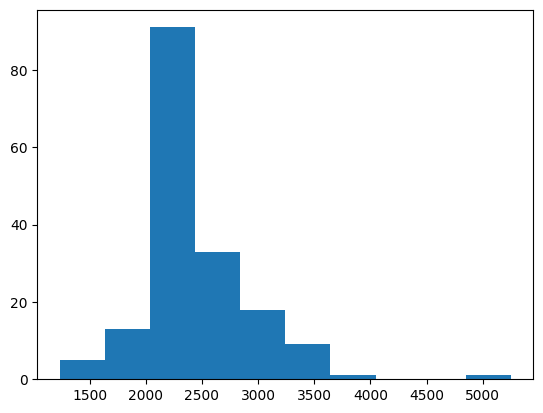


Sodium np.log Histogram:


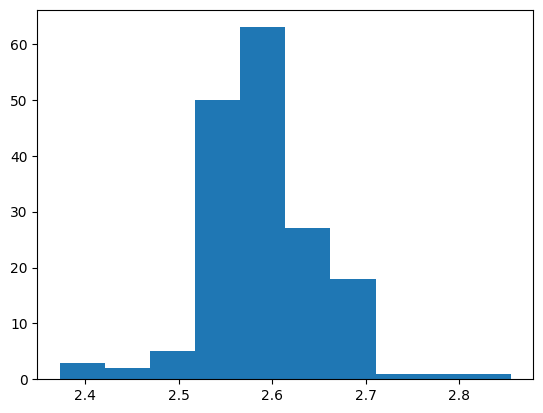


Sodium np.exp Histogram:


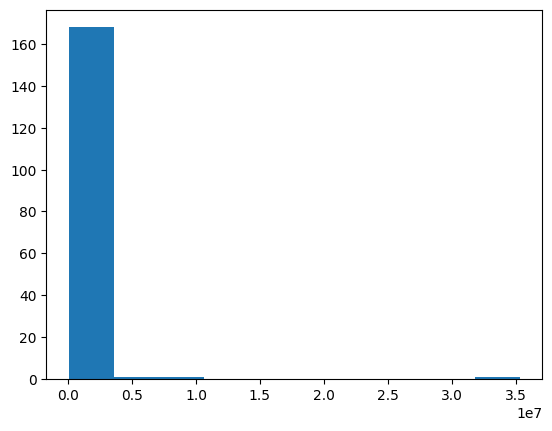

In [20]:
# No transformation applied to Sodium feature shown as histogram
print("Original Sodium Histogram:")
plt.hist(X_train['Sodium'].values.reshape(-1, 1), bins=10)
plt.show()
print()

# Transformation squaring applied to Sodium feature shown as histogram
print("Sodium Squaring Histogram:")
plt.hist(X_train['Sodium'].values.reshape(-1, 1)**2, bins=10)
plt.show()
print()

# Transformation cubing applied to Sodium feature shown as histogram
print("Sodium Cubing Histogram:")
plt.hist(X_train['Sodium'].values.reshape(-1, 1)**3, bins=10)
plt.show()
print()

# Transformation np.log applied to Sodium feature shown as histogram
print("Sodium np.log Histogram:")
plt.hist(np.log(X_train['Sodium'].values.reshape(-1, 1)), bins=10)
plt.show()
print()

# Transformation np.exp applied to Sodium feature shown as histogram
print("Sodium np.exp Histogram:")
plt.hist(np.exp(X_train['Sodium'].values.reshape(-1, 1)), bins=10)
plt.show()
print()

### Transformations (squaring, cubbing, np.log and np.exp) applied to Silicon feature in training set and represented as 4 histograms

Original Silicon Histogram:


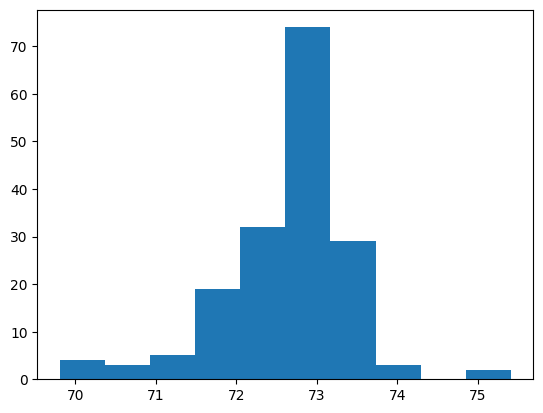


Silicon Squaring Histogram:


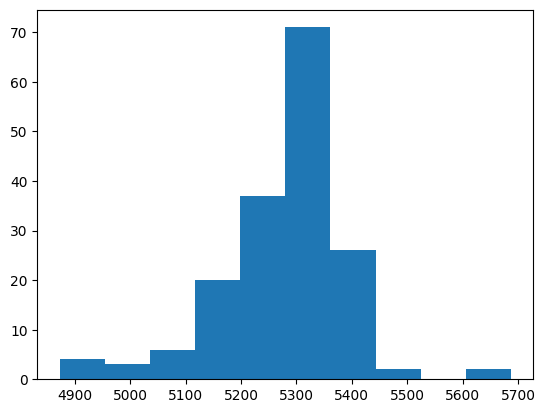


Silicon Cubing Histogram:


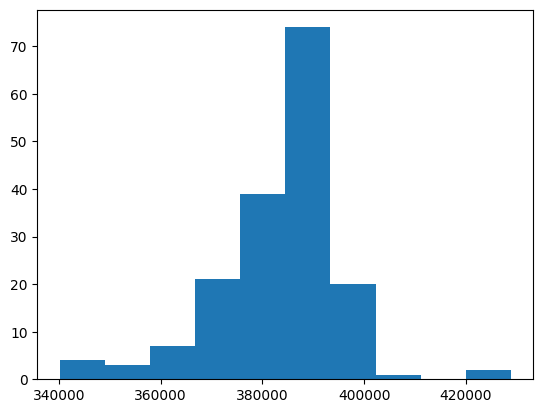


Silicon np.log Histogram:


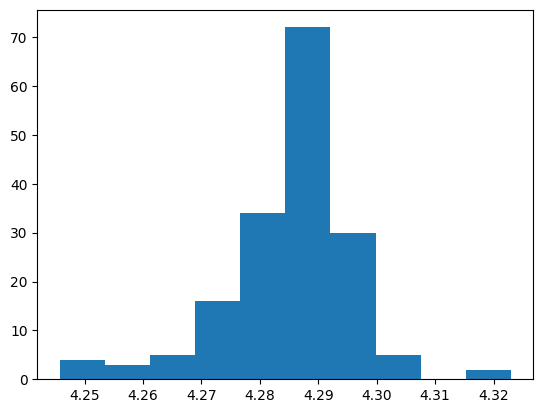


Silicon np.exp Histogram:


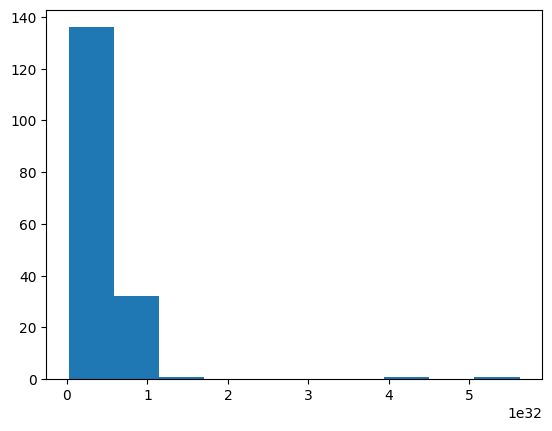

In [21]:
# No transformation applied to Silicon feature shown as histogram
print("Original Silicon Histogram:")
plt.hist(X_train['Silicon'].values.reshape(-1, 1), bins=10)
plt.show()
print()

# Transformation squaring applied to Silicon feature shown as histogram
print("Silicon Squaring Histogram:")
plt.hist(X_train['Silicon'].values.reshape(-1, 1)**2, bins=10)
plt.show()
print()

# Transformation cubing applied to Silicon feature shown as histogram
print("Silicon Cubing Histogram:")
plt.hist(X_train['Silicon'].values.reshape(-1, 1)**3, bins=10)
plt.show()
print()

# Transformation np.log applied to Silicon feature shown as histogram
print("Silicon np.log Histogram:")
plt.hist(np.log(X_train['Silicon'].values.reshape(-1, 1)), bins=10)
plt.show()
print()

# Transformation np.exp applied to Silicon feature shown as histogram
print("Silicon np.exp Histogram:")
plt.hist(np.exp(X_train['Silicon'].values.reshape(-1, 1)), bins=10)
plt.show()
print()

### Transformations (squaring, cubbing, np.log and np.exp) applied to Sodium & Silicon features in training set and represented as scatter matrices

Original Scatter Matrix Sodium & Silicon:



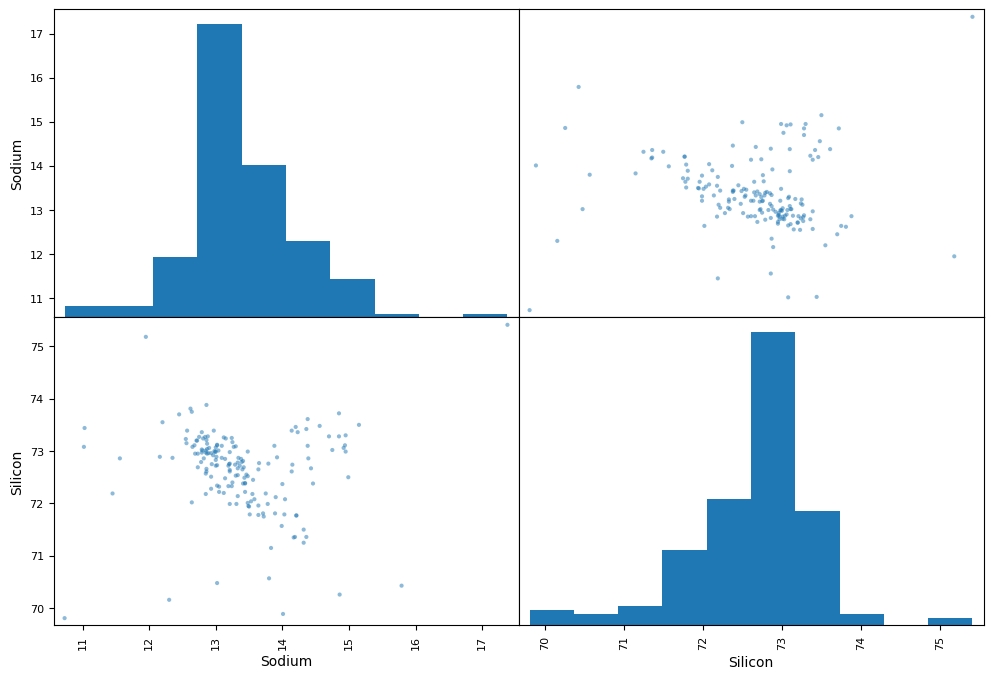

In [22]:
# Original scatter matrix applied to Sodium & Silicon features
print("Original Scatter Matrix Sodium & Silicon:")
attributes = ["Sodium", "Silicon"]
scatter_matrix(X_train[attributes], figsize=(12, 8))
print()

Squaring Scatter Matrix of Sodium & Silicon:



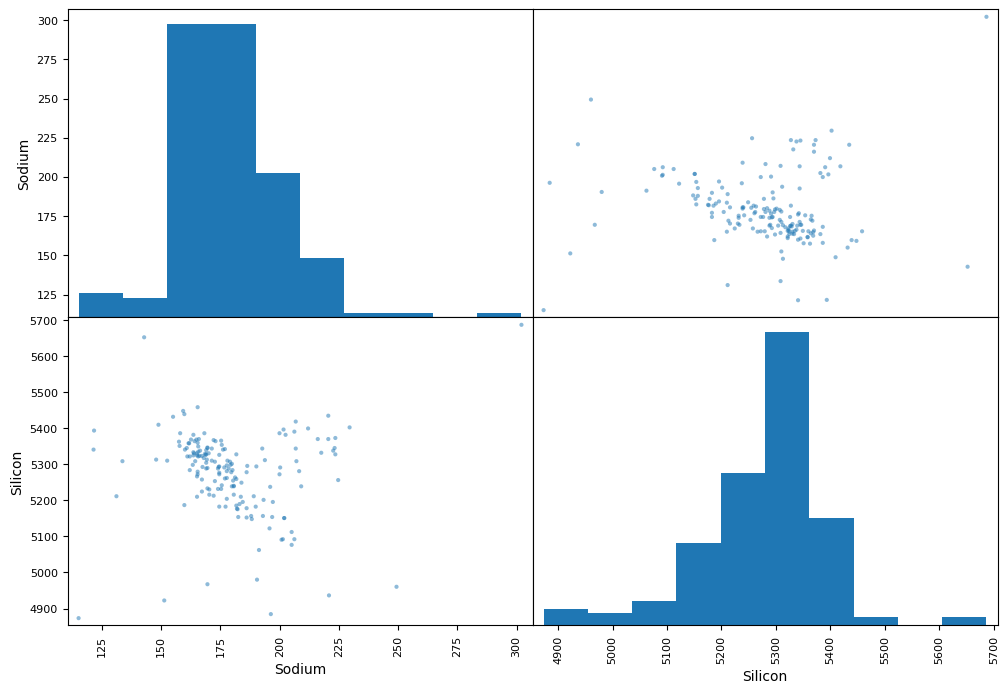

In [23]:
# Transformation squaring applied to Sodium & Silicon features shown as scatter matrix
print("Squaring Scatter Matrix of Sodium & Silicon:")
scatter_matrix(X_train[attributes]**2, figsize=(12, 8))
print()

Cubed Scatter Matrix of Sodium & Silicon:



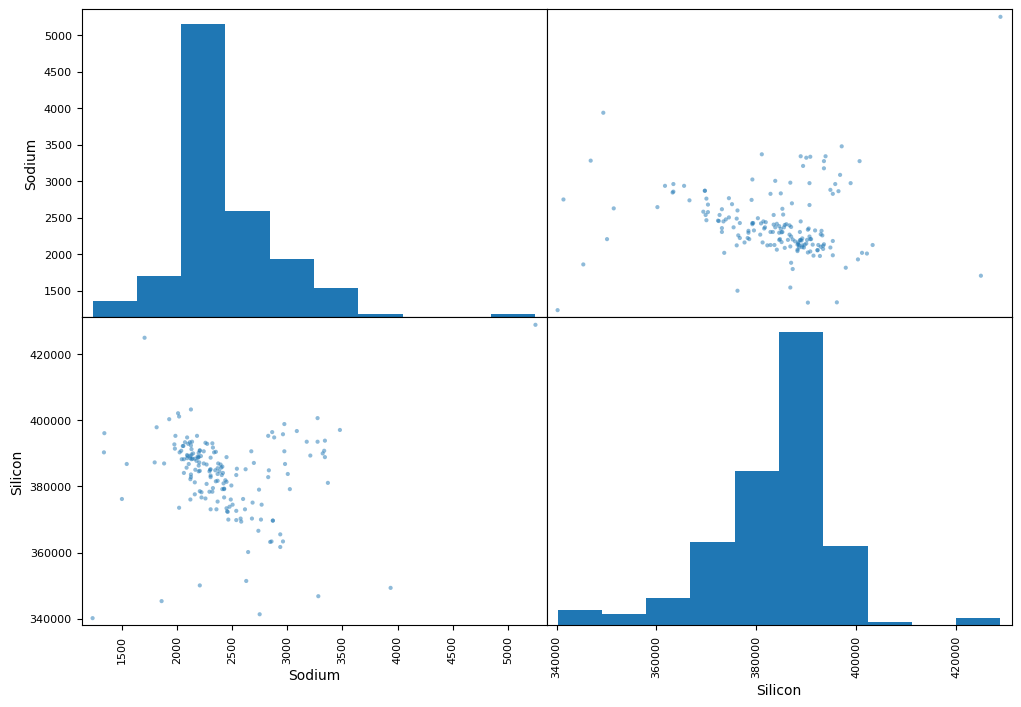

In [24]:
# Transformation for cubing applied to Sodium & Silicon features shown as scatter matrix
print("Cubed Scatter Matrix of Sodium & Silicon:")
scatter_matrix(X_train[attributes]**3, figsize=(12, 8))
print()

np.log Scatter Matrix of Sodium & Silicon:



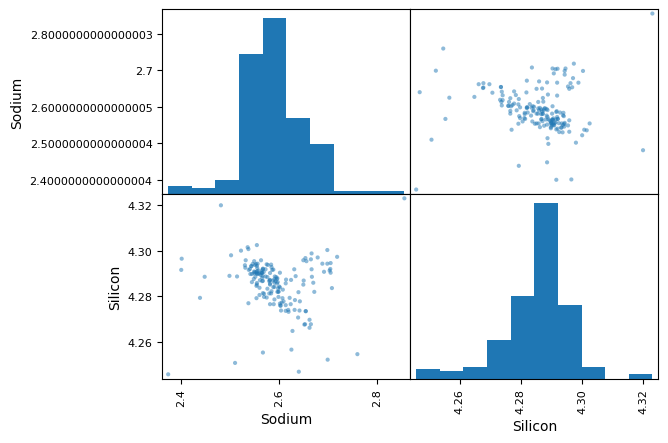

In [25]:
# Transformation for np.log applied to Sodium & Silicon features shown as scatter matrix
print("np.log Scatter Matrix of Sodium & Silicon:")
scatter_matrix(np.log(X_train[attributes]))
print()

np.exp Scatter Matrix of Sodium & Silicon:



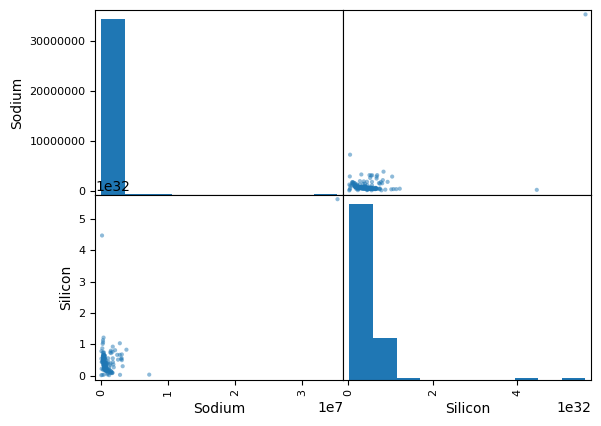

In [26]:
# Transformation for np.exp applied to Sodium & Silicon features shown as scatter matrix
print("np.exp Scatter Matrix of Sodium & Silicon:")
scatter_matrix(np.exp(X_train[attributes]))
print()